/home/cryzal/ml/myenv/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-11-692ec3e9efb6>:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, Z, alpha=0.8)


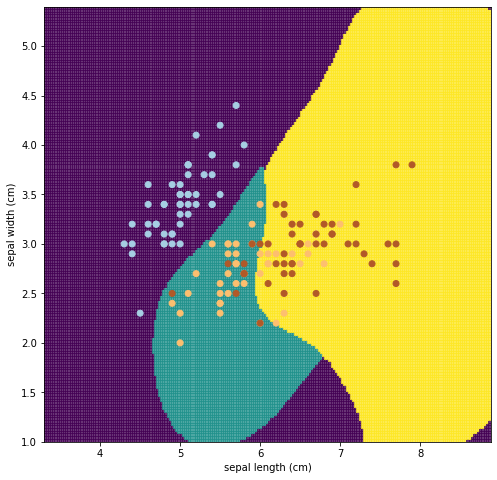

In [11]:
## 4.4 Visualizing boundaries of a supervised ML
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = pd.DataFrame(iris.data[:,:2], columns=iris.feature_names[:2])
y = pd.DataFrame(iris.target, columns = ["species"], dtype='category')

svc = svm.SVC(kernel='rbf', C=10, gamma=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0) 
svc.fit(x_train,y_train)


# # create a mesh to plot in
x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.pcolormesh(xx, yy, Z, alpha=0.8)
ax.scatter(x.iloc[:,0], x.iloc[:,1], c=y['species'].cat.codes, cmap=plt.cm.Paired)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
plt.show()